<a href="https://colab.research.google.com/github/TannviAishwaryam/Bike-Rental-Multiple-Linear-Regression/blob/main/Bike_rental_%7CMultiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
harishkumardatalab_shared_bikes_demand_prediction_path = kagglehub.dataset_download('harishkumardatalab/shared-bikes-demand-prediction')

print('Data source import complete.')


100%|██████████| 21.6k/21.6k [00:00<00:00, 24.8MB/s]

Extracting files...
Data source import complete.


#**Multiple linear regression**
BoomBikes, a US-based bike-sharing company, has collected daily rental data that reflects various environmental and seasonal conditions. The company now aims to analyze this dataset to identify the factors influencing the demand for its shared bikes in the American market. This understanding will help it design an informed business strategy to boost revenue quickly once the COVID-19 lockdown ends.

In particular, the company seeks to determine:

Which factors play a significant role in predicting bike rental demand.

How effectively these factors explain the variations in demand.

The emphasis is on both prediction and clear interpretation of these relationships.

# 1. Data Understanding and Exploration

Importing required libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
# The file was downloaded using kagglehub in the first cell.
# We need to read it from the path where kagglehub saved it.
# The file name is likely 'day.csv' based on typical Kaggle datasets for bike demand prediction.
# Let's find the correct file path from the downloaded data.
import os

# The dataset is extracted directly into the downloaded path.
file_path = os.path.join(harishkumardatalab_shared_bikes_demand_prediction_path, 'day.csv')

BS_day = pd.read_csv(file_path)

In [ ]:
# Let's take a look at the first few rows
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,01/01/18,1.0,0.0,1.0,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,02/01/18,1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3.0,03/01/18,1.0,0.0,1.0,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4.0,04/01/18,1.0,0.0,1.0,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5.0,05/01/18,1.0,0.0,1.0,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [ ]:
# Let's look at the number of rows and columns in the dataset
BS_day.shape

(752, 16)

In [ ]:
# Understanding the feature names in the dataset
BS_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# Getting insights of the features
BS_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,750.00000,750.000000,750.000000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,2.538667,0.486667,6.61200,0.029333,2.997333,0.689333,1.398667,20.360706,23.774772,63.074381,12.696712,849.177333,3652.532000,4501.709333
std,216.65064,1.121687,0.500156,3.44402,0.168852,2.001333,0.463075,0.546623,7.428582,8.062247,14.268511,5.207521,684.878069,1543.500637,1916.818954
min,1.00000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,188.25000,2.000000,0.000000,4.00000,0.000000,1.000000,0.000000,1.000000,14.016885,16.965875,52.354150,9.000663,318.000000,2507.250000,3191.000000
50%,375.50000,3.000000,0.000000,7.00000,0.000000,3.000000,1.000000,1.000000,20.739153,24.605200,63.229200,12.041709,703.500000,3657.000000,4551.000000
75%,562.75000,4.000000,1.000000,10.00000,0.000000,5.000000,1.000000,2.000000,26.786653,30.382175,73.354175,15.620748,1094.750000,4726.250000,5894.250000
max,750.00000,4.000000,1.000000,12.00000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# Summary of the dataset: 730 rows, 16 columns, no null values
print(BS_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     750 non-null    float64
 1   dteday      750 non-null    object 
 2   season      750 non-null    float64
 3   yr          750 non-null    float64
 4   mnth        750 non-null    float64
 5   holiday     750 non-null    float64
 6   weekday     750 non-null    float64
 7   workingday  750 non-null    float64
 8   weathersit  750 non-null    float64
 9   temp        750 non-null    float64
 10  atemp       750 non-null    float64
 11  hum         750 non-null    float64
 12  windspeed   750 non-null    float64
 13  casual      750 non-null    float64
 14  registered  750 non-null    float64
 15  cnt         750 non-null    float64
dtypes: float64(15), object(1)
memory usage: 94.1+ KB
None


#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [ ]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

# 1=spring
BS_day.loc[(BS_day['season'] == 1) , 'season'] = 'spring'

# 2=summer
BS_day.loc[(BS_day['season'] == 2) , 'season'] = 'summer'

# 3=fall
BS_day.loc[(BS_day['season'] == 3) , 'season'] = 'fall'

# 4=winter
BS_day.loc[(BS_day['season'] == 4) , 'season'] = 'winter'

In [ ]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
BS_day['season'].astype('category').value_counts()

,count
season,
winter,198
fall,188
summer,184
spring,180


In [ ]:
# year (0: 2018, 1:2019)
BS_day['yr'].astype('category').value_counts()

,count
yr,
0.0,385
1.0,365


In [ ]:
# Assigning string values to different months instead of numeric values which may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the two columns
BS_day[['mnth']] = BS_day[['mnth']].apply(object_map)

In [ ]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
BS_day['mnth'].astype('category').value_counts()

,count
mnth,
Oct,77
Sept,65
Aug,62
Dec,62
May,62
Mar,62
Jan,62
Jul,62
Jun,60


In [ ]:
# whether day is a holiday or not (0: No, 1: Yes)
BS_day['holiday'].astype('category').value_counts()

,count
holiday,
0.0,728
1.0,22


In [ ]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
# A function has been created to map the actual numbers to categorical levels.
def str_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the two columns
BS_day[['weekday']] = BS_day[['weekday']].apply(str_map)

In [ ]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
BS_day['weekday'].astype('category').value_counts()

,count
weekday,
Wed,108
Mon,107
Fri,107
Sat,107
Sun,107
Thurs,107
Tues,107


In [ ]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
BS_day['workingday'].astype('category').value_counts()

,count
workingday,
1.0,517
0.0,233


In [ ]:
# Replacing long weathersit names into string values for better readability and understanding

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
BS_day.loc[(BS_day['weathersit'] == 1) , 'weathersit'] = 'A'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
BS_day.loc[(BS_day['weathersit'] == 2) , 'weathersit'] = 'B'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
BS_day.loc[(BS_day['weathersit'] == 3) , 'weathersit'] = 'C'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
BS_day.loc[(BS_day['weathersit'] == 4) , 'weathersit'] = 'D'

In [ ]:
# Extracting the type of weather situations present in the data
BS_day['weathersit'].unique()

array(['B', 'A', 'C', nan], dtype=object)

In [ ]:
# Taking count based on weather situations
BS_day['weathersit'].astype('category').value_counts()

,count
weathersit,
A,473
B,255
C,22


# 2. Data Visualisation

Let's start **understanding the data**.
- Understanding the distribution of various numeric variables
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

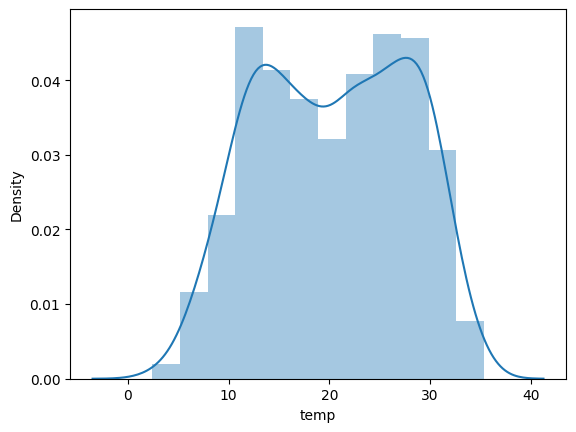

In [ ]:
# temperature
sns.distplot(BS_day['temp'])
plt.show()

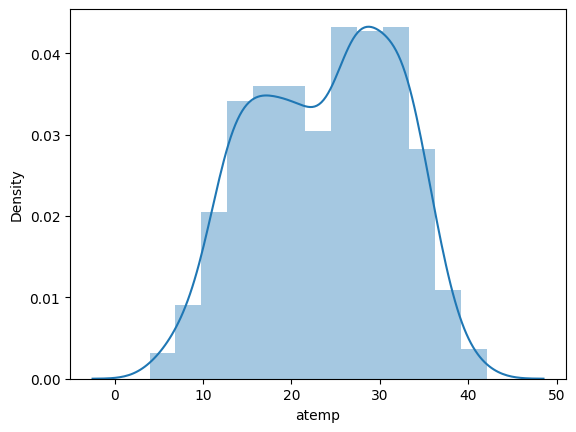

In [ ]:
# feeling temperature
sns.distplot(BS_day['atemp'])
plt.show()

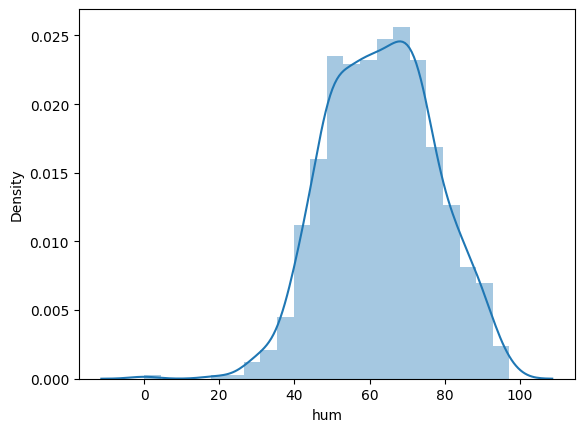

In [ ]:
# humidity
sns.distplot(BS_day['hum'])
plt.show()

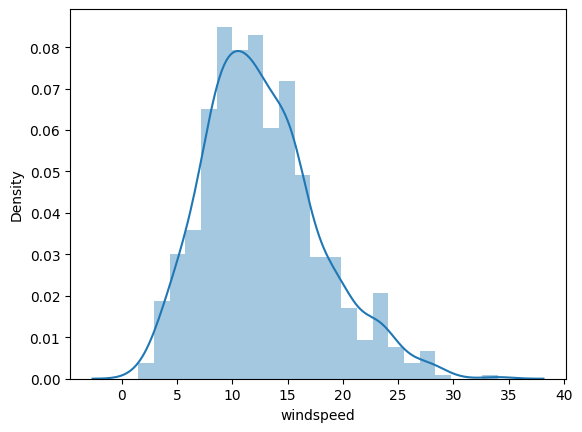

In [ ]:
# wind speed
sns.distplot(BS_day['windspeed'])
plt.show()

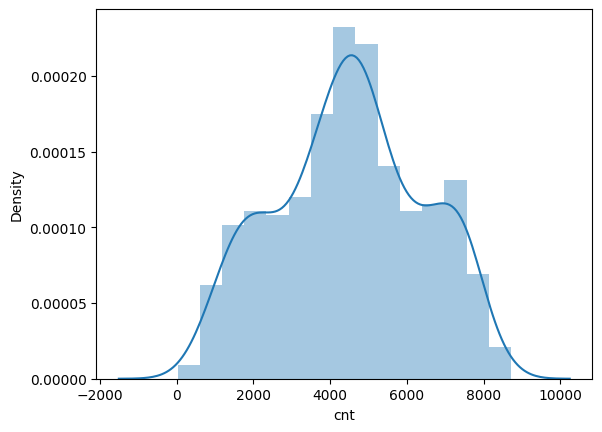

In [ ]:
# Target variable: count of total rental bikes including both casual and registered
sns.distplot(BS_day['cnt'])
plt.show()

In [ ]:
# Converting date to datetime format
BS_day['dteday']=BS_day['dteday'].astype('datetime64[ns]')

In [ ]:
# All categorical variables in the dataset
BS_day_categorical=BS_day.select_dtypes(exclude=['float64','datetime64','int64'])
print(BS_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [ ]:
BS_day_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Wed,B
1,spring,Jan,Thurs,B
2,spring,Jan,Fri,A
3,spring,Jan,Sat,A
4,spring,Jan,Sun,A
...,...,...,...,...
747,winter,Oct,Mon,B
748,winter,Oct,Tues,B
749,winter,Oct,Wed,A
750,NaN,NaN,NaN,NaN


## Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

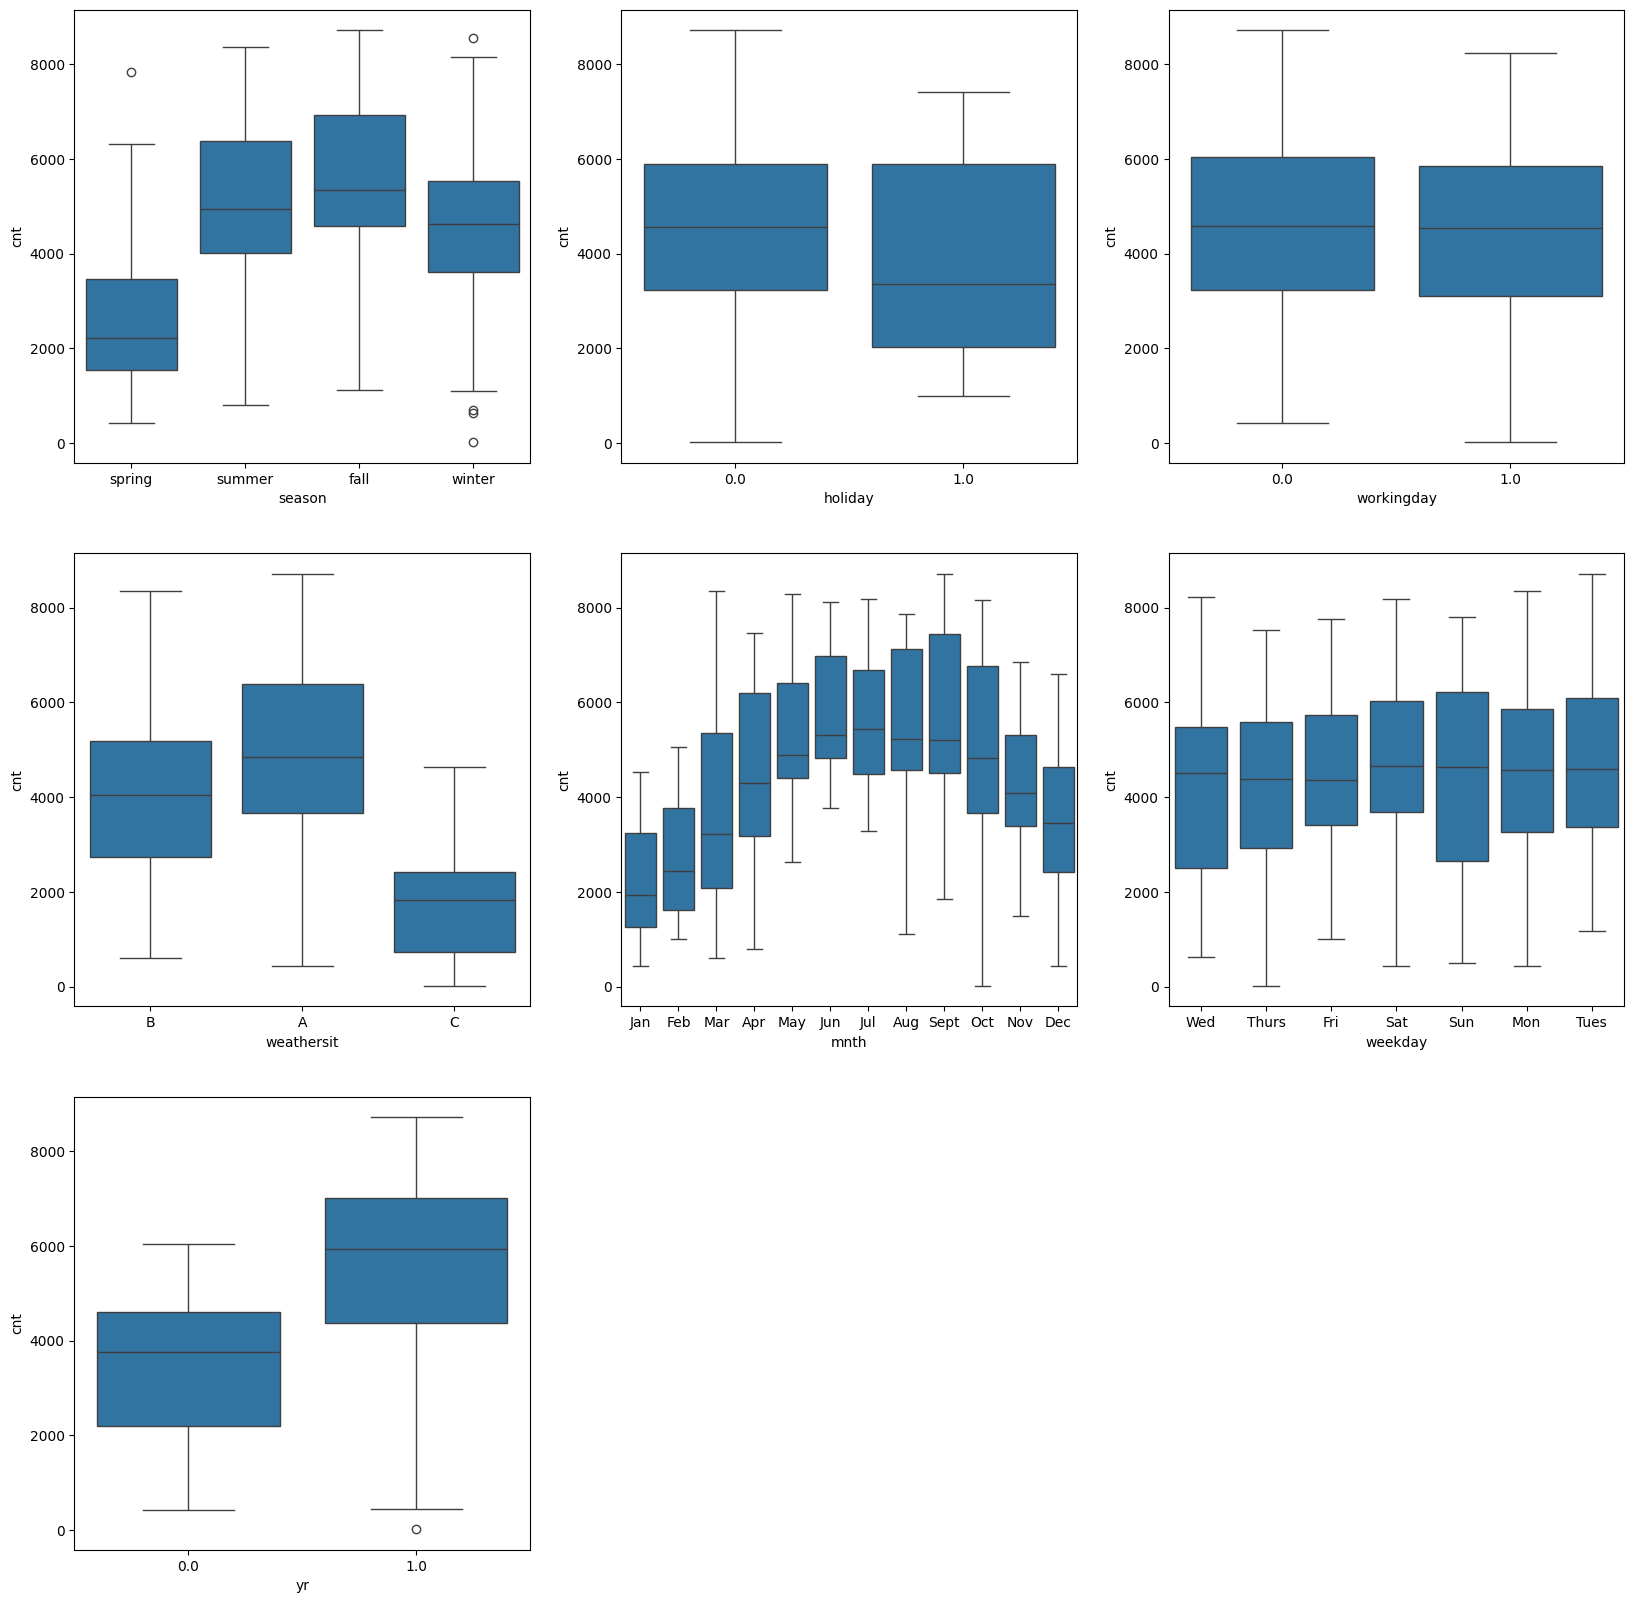

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BS_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = BS_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = BS_day)
plt.show()
#plt.subplot(3,3,8)
#sns.boxplot(x = 'date', y = 'cnt', data = BS_day)


## Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [ ]:
# Converting "casual","registered" and "cnt" numeric variables to float.
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    BS_day[var] = BS_day[var].astype("float")
#BS_day['casual']= BS_day['casual'].astype('float')
#BS_day['registered']=BS_day['registered'].astype('float')
#BS_day['cnt']=BS_day['cnt'].astype('float')
#BS_day.head()

In [ ]:
# All numeric variables in the dataset
BS_day_numeric = BS_day.select_dtypes(include=['float64'])
BS_day_numeric.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,0.0,0.0,1.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,0.0,0.0,1.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3.0,0.0,0.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4.0,0.0,0.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5.0,0.0,0.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


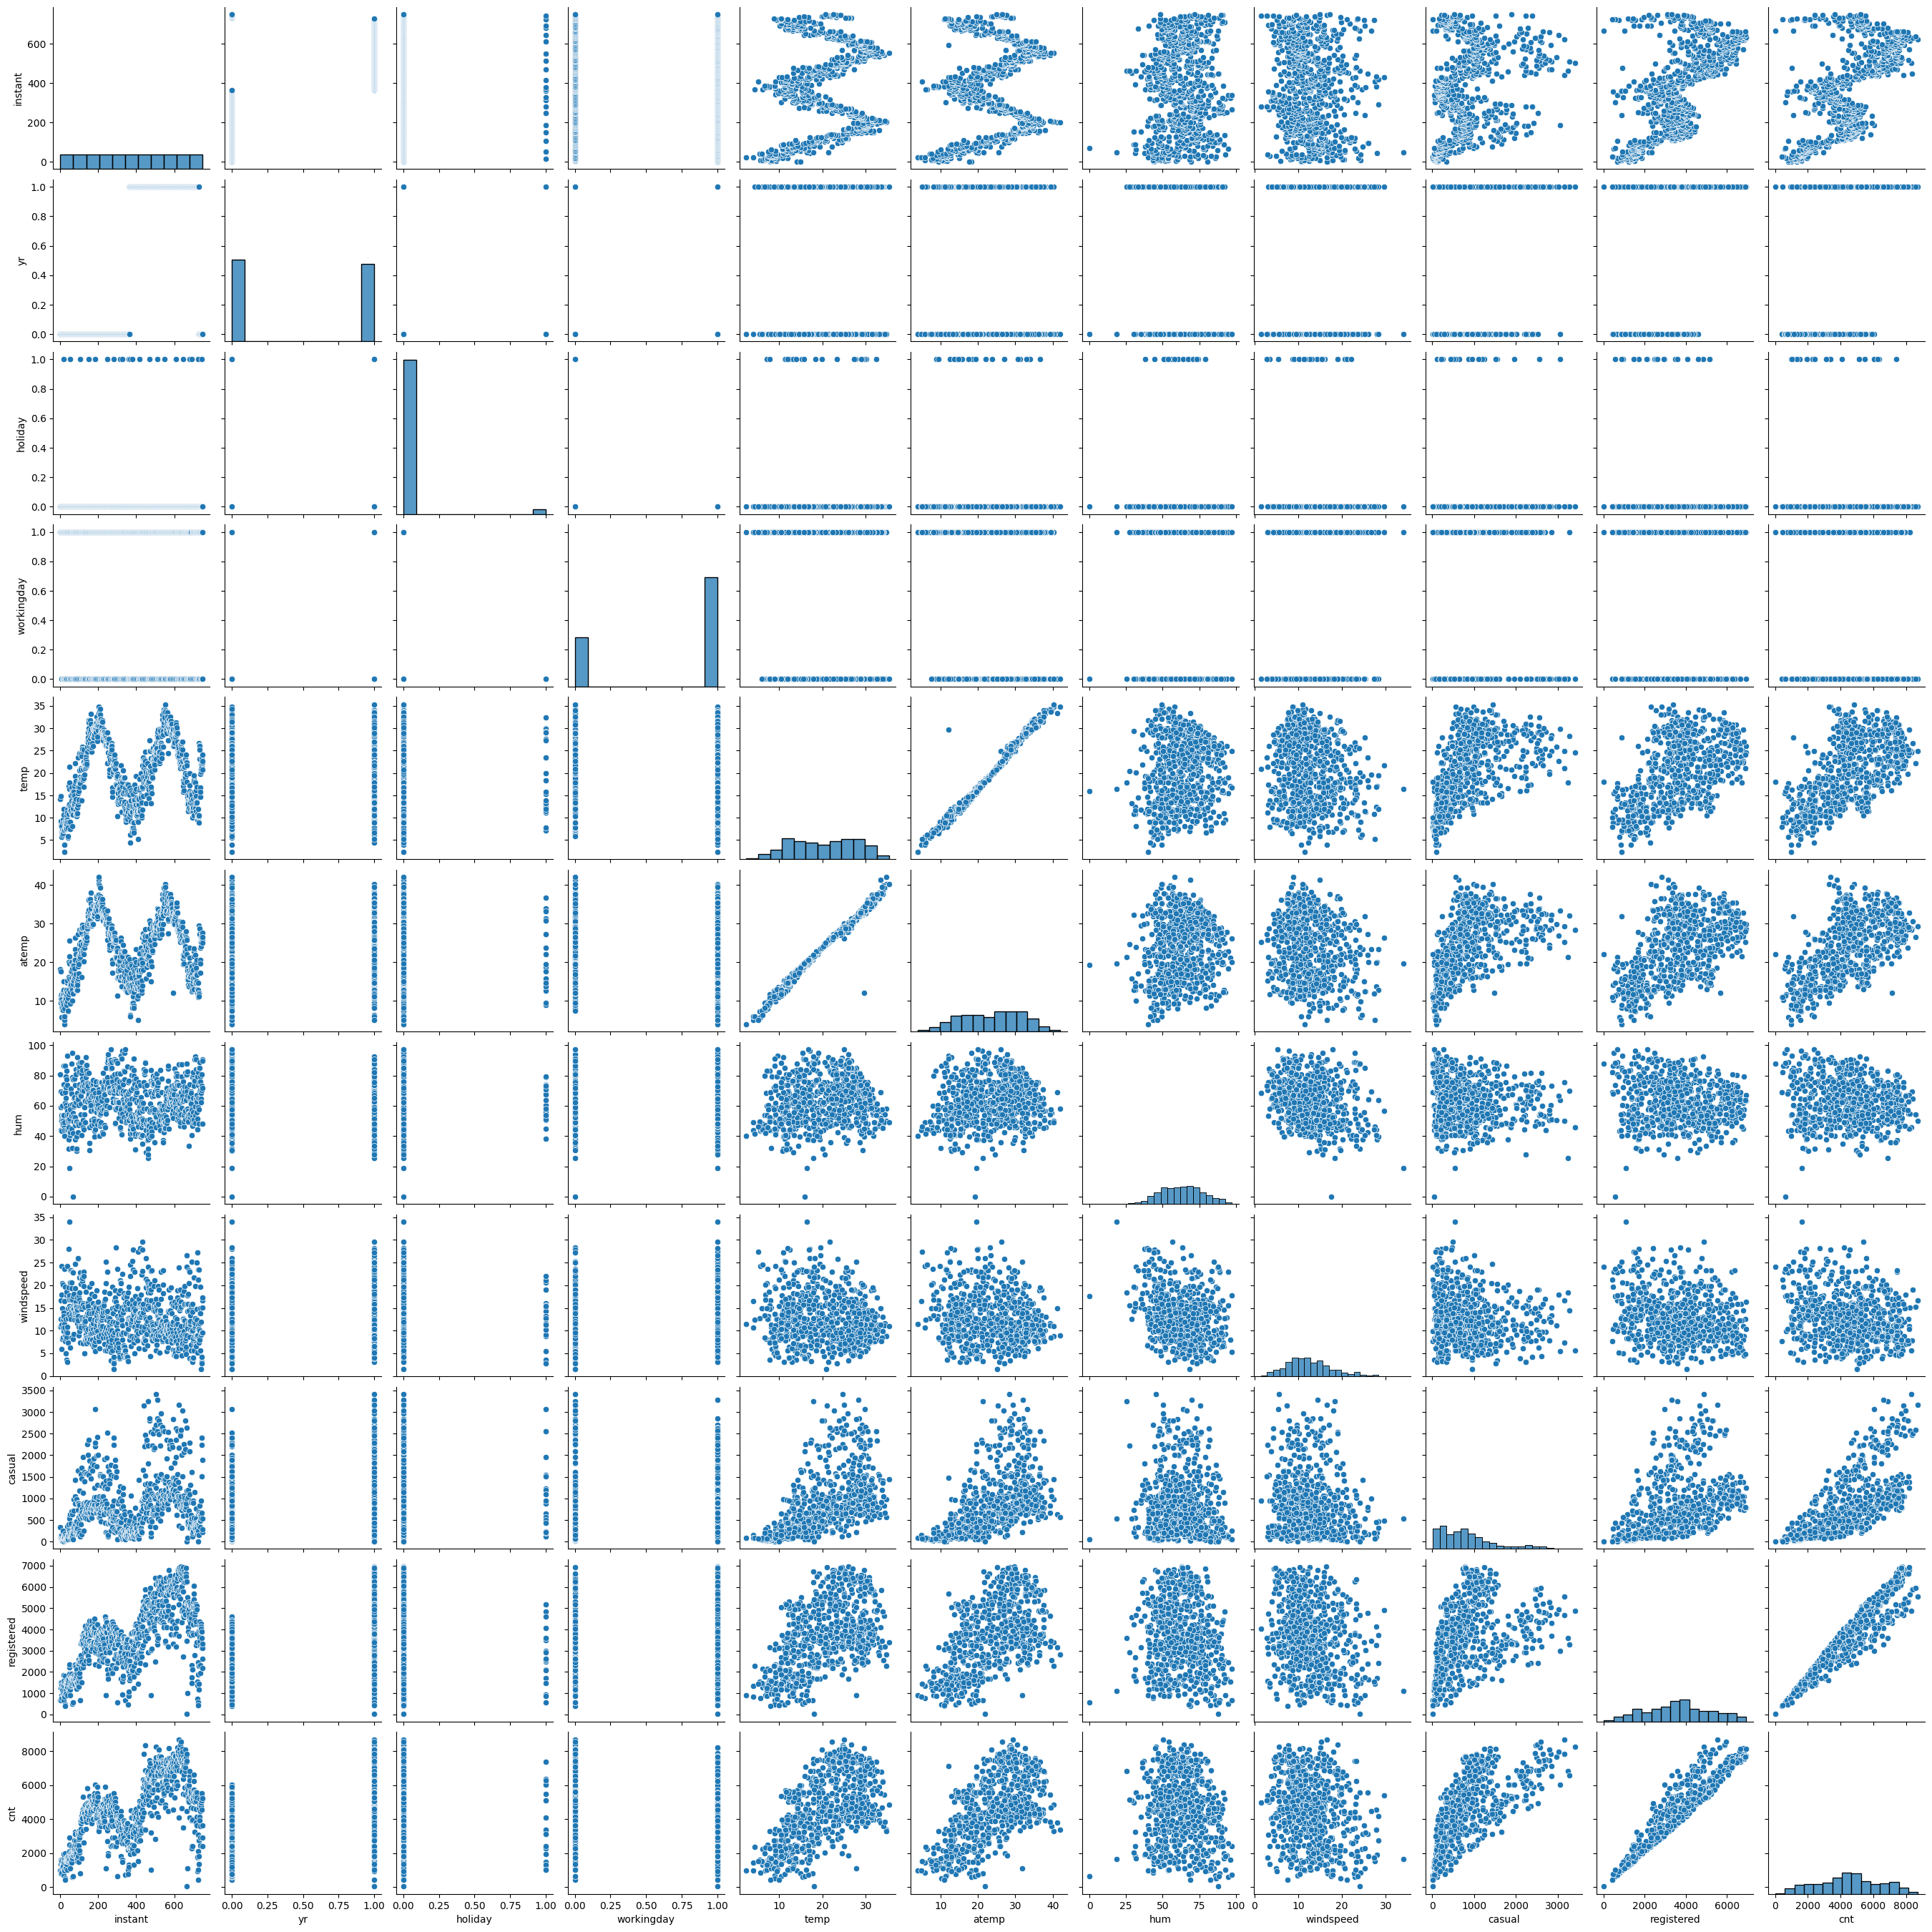

In [ ]:
# Pairwise scatter plot
sns.pairplot(BS_day_numeric)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [ ]:
# Correlation matrix
cor = BS_day_numeric.corr()
cor

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.775773,0.021095,-0.018425,0.153679,0.156440,0.051636,-0.128147,0.261738,0.625473,0.597175
yr,0.775773,1.000000,0.004637,-0.009262,0.042568,0.040618,-0.130460,0.001226,0.244577,0.591241,0.563478
holiday,0.021095,0.004637,1.000000,-0.258948,-0.025712,-0.029566,-0.012958,-0.006822,0.059932,-0.105922,-0.063879
workingday,-0.018425,-0.009262,-0.258948,1.000000,-0.001047,0.007238,0.054510,0.003412,-0.085873,0.001821,-0.029216
temp,0.153679,0.042568,-0.025712,-0.001047,1.000000,0.991650,0.132898,-0.160563,0.535213,0.537629,0.624152
atemp,0.156440,0.040618,-0.029566,0.007238,0.991650,1.000000,0.144996,-0.185982,0.536707,0.541982,0.628191
hum,0.051636,-0.130460,-0.012958,0.054510,0.132898,0.144996,1.000000,-0.252850,-0.081733,-0.094227,-0.105079
windspeed,-0.128147,0.001226,-0.006822,0.003412,-0.160563,-0.185982,-0.252850,1.000000,-0.172904,-0.216270,-0.235928
casual,0.261738,0.244577,0.059932,-0.085873,0.535213,0.536707,-0.081733,-0.172904,1.000000,0.389147,0.670657
registered,0.625473,0.591241,-0.105922,0.001821,0.537629,0.541982,-0.094227,-0.216270,0.389147,1.000000,0.944283


Let's plot the correlations on a heatmap for better visualisation

<Axes: >

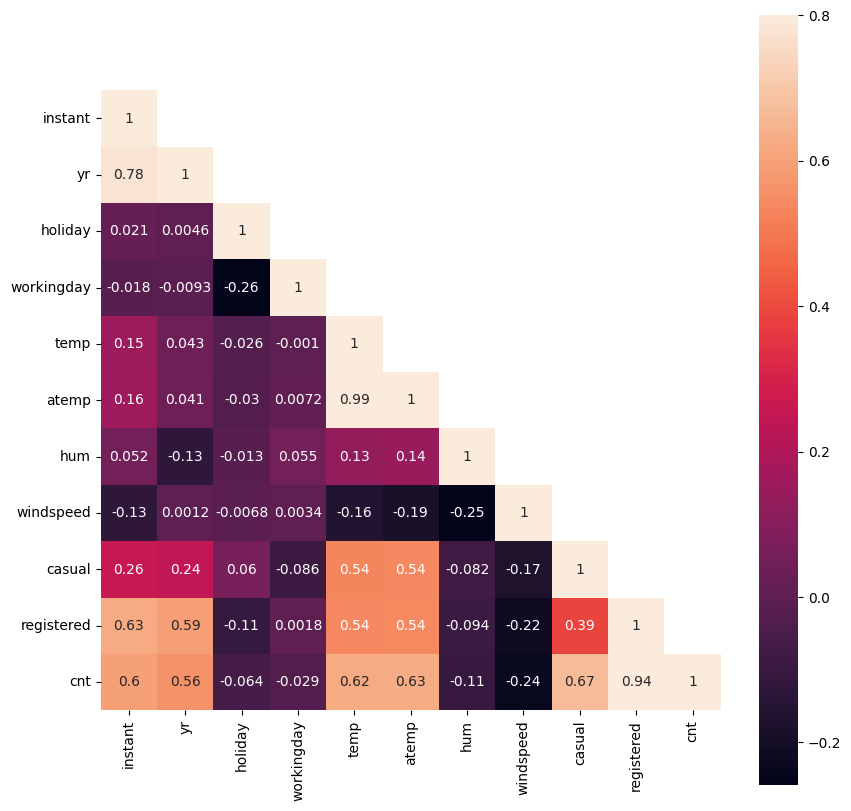

In [ ]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

The heatmap shows some useful insights:

Correlation of Count('cnt') with independent variables:
- Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'atemp'. We can clearly understand the high positive correlation of count with 'registered' and 'casual' as both of them together add up to represent count.

- Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

Correlation among independent variables:
- Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.


Thus, while building the model, we'll have to pay attention to multicollinearity.

In [ ]:
#removing atemp as it is highly correlated with temp
BS_day.drop('atemp',axis=1,inplace=True)

# 3. Data Preparation


#### Data Preparation

Let's now prepare the data and build the model.
Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [ ]:
# Subset all categorical variables
BS_day_categorical=BS_day.select_dtypes(include=['object'])

#### Dummy Variables
The variable `season`,`mnth`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers.

For this, we will use something called `dummy variables`.

In [ ]:
# Convert into dummies using one-hot encoding method
BS_day_dummies = pd.get_dummies(BS_day_categorical, drop_first=True)
BS_day_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Drop categorical variable columns
BS_day = BS_day.drop(list(BS_day_categorical.columns), axis=1)

In [ ]:
# Concatenate dummy variables with the original dataframe
BS_day = pd.concat([BS_day, BS_day_dummies], axis=1)

In [ ]:
# Let's check the first few rows
BS_day.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1.0,2018-01-01,0.0,0.0,1.0,14.110847,80.5833,10.749882,331.0,654.0,...,False,False,False,False,False,False,False,True,True,False
1,2.0,2018-02-01,0.0,0.0,1.0,14.902598,69.6087,16.652113,131.0,670.0,...,False,False,False,False,False,True,False,False,True,False
2,3.0,2018-03-01,0.0,0.0,1.0,8.050924,43.7273,16.636703,120.0,1229.0,...,False,False,False,False,False,False,False,False,False,False
3,4.0,2018-04-01,0.0,0.0,1.0,8.200000,59.0435,10.739832,108.0,1454.0,...,False,False,False,True,False,False,False,False,False,False
4,5.0,2018-05-01,0.0,0.0,1.0,9.305237,43.6957,12.522300,82.0,1518.0,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
BS_day=BS_day.drop(['instant','dteday'], axis = 1, inplace = False)
BS_day.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0.0,0.0,1.0,14.110847,80.5833,10.749882,331.0,654.0,985.0,True,...,False,False,False,False,False,False,False,True,True,False
1,0.0,0.0,1.0,14.902598,69.6087,16.652113,131.0,670.0,801.0,True,...,False,False,False,False,False,True,False,False,True,False
2,0.0,0.0,1.0,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,True,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,1.0,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,True,...,False,False,False,True,False,False,False,False,False,False
4,0.0,0.0,1.0,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,True,...,False,False,False,False,True,False,False,False,False,False


# 4. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

In [ ]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(BS_day, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
658,1.0,0.0,1.0,19.030847,51.0000,11.125618,2132.0,4692.0,6824.0,False,...,True,False,False,False,False,False,False,True,False,False
58,0.0,0.0,1.0,16.698193,87.6364,19.408962,81.0,1365.0,1446.0,True,...,False,False,False,False,False,False,False,False,True,False
244,0.0,0.0,0.0,26.376653,72.7083,9.375243,875.0,3852.0,4727.0,False,...,False,True,False,False,False,False,True,False,True,False
489,1.0,0.0,0.0,25.488347,75.6667,10.250464,2496.0,4387.0,6883.0,False,...,False,False,False,False,False,False,True,False,True,False
725,1.0,0.0,1.0,10.420847,65.2917,23.458911,247.0,1867.0,2114.0,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.0,1.0,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,False,...,False,False,False,False,True,False,False,False,False,False
53,0.0,0.0,1.0,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,True,...,False,False,False,False,True,False,False,False,False,False
350,0.0,0.0,1.0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,False,...,False,False,False,False,False,False,False,True,True,False
79,0.0,0.0,1.0,17.647835,73.7391,19.348461,401.0,1676.0,2077.0,False,...,False,False,False,False,False,False,False,False,True,False


### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

Let's scale all these columns using MinMaxScaler. You can use any other scaling method as well; it is totally up to you.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','casual','registered','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [ ]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
658,1.0,0.0,1.0,0.513223,0.525547,0.296167,0.649192,0.677396,0.782559,False,...,True,False,False,False,False,False,False,True,False,False
58,0.0,0.0,1.0,0.441132,0.903080,0.551041,0.024078,0.195012,0.163829,True,...,False,False,False,False,False,False,False,False,True,False
244,0.0,0.0,0.0,0.740244,0.749248,0.242309,0.266077,0.555604,0.541302,False,...,False,True,False,False,False,False,True,False,True,False
489,1.0,0.0,0.0,0.712791,0.779734,0.269239,0.760134,0.633174,0.789347,False,...,False,False,False,False,False,False,True,False,True,False
725,1.0,0.0,1.0,0.247131,0.672821,0.675656,0.074672,0.267798,0.240681,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.0,1.0,0.878570,0.679690,0.220508,0.298994,0.907351,0.832835,False,...,False,False,False,False,True,False,False,False,False,False
53,0.0,0.0,1.0,0.206042,0.435939,0.147857,0.041756,0.254893,0.218017,True,...,False,False,False,False,True,False,False,False,False,False
350,0.0,0.0,1.0,0.252410,0.577930,0.455140,0.083206,0.354357,0.312586,False,...,False,False,False,False,False,False,False,True,True,False
79,0.0,0.0,1.0,0.470481,0.759870,0.549180,0.121609,0.240104,0.236424,False,...,False,False,False,False,False,False,False,False,True,False


As expected, the variables have been appropriately scaled.

In [ ]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,0.499048,0.026667,0.691429,0.543352,0.653410,0.343871,0.250316,0.526794,0.512493
std,0.500476,0.161261,0.462344,0.228238,0.146380,0.162730,0.208602,0.231567,0.228721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343219,0.547445,0.229511,0.092350,0.347832,0.343189
50%,0.000000,0.000000,1.000000,0.551236,0.656934,0.315400,0.209083,0.525881,0.513346
75%,1.000000,0.000000,1.000000,0.734965,0.757183,0.430092,0.322463,0.699000,0.692476
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


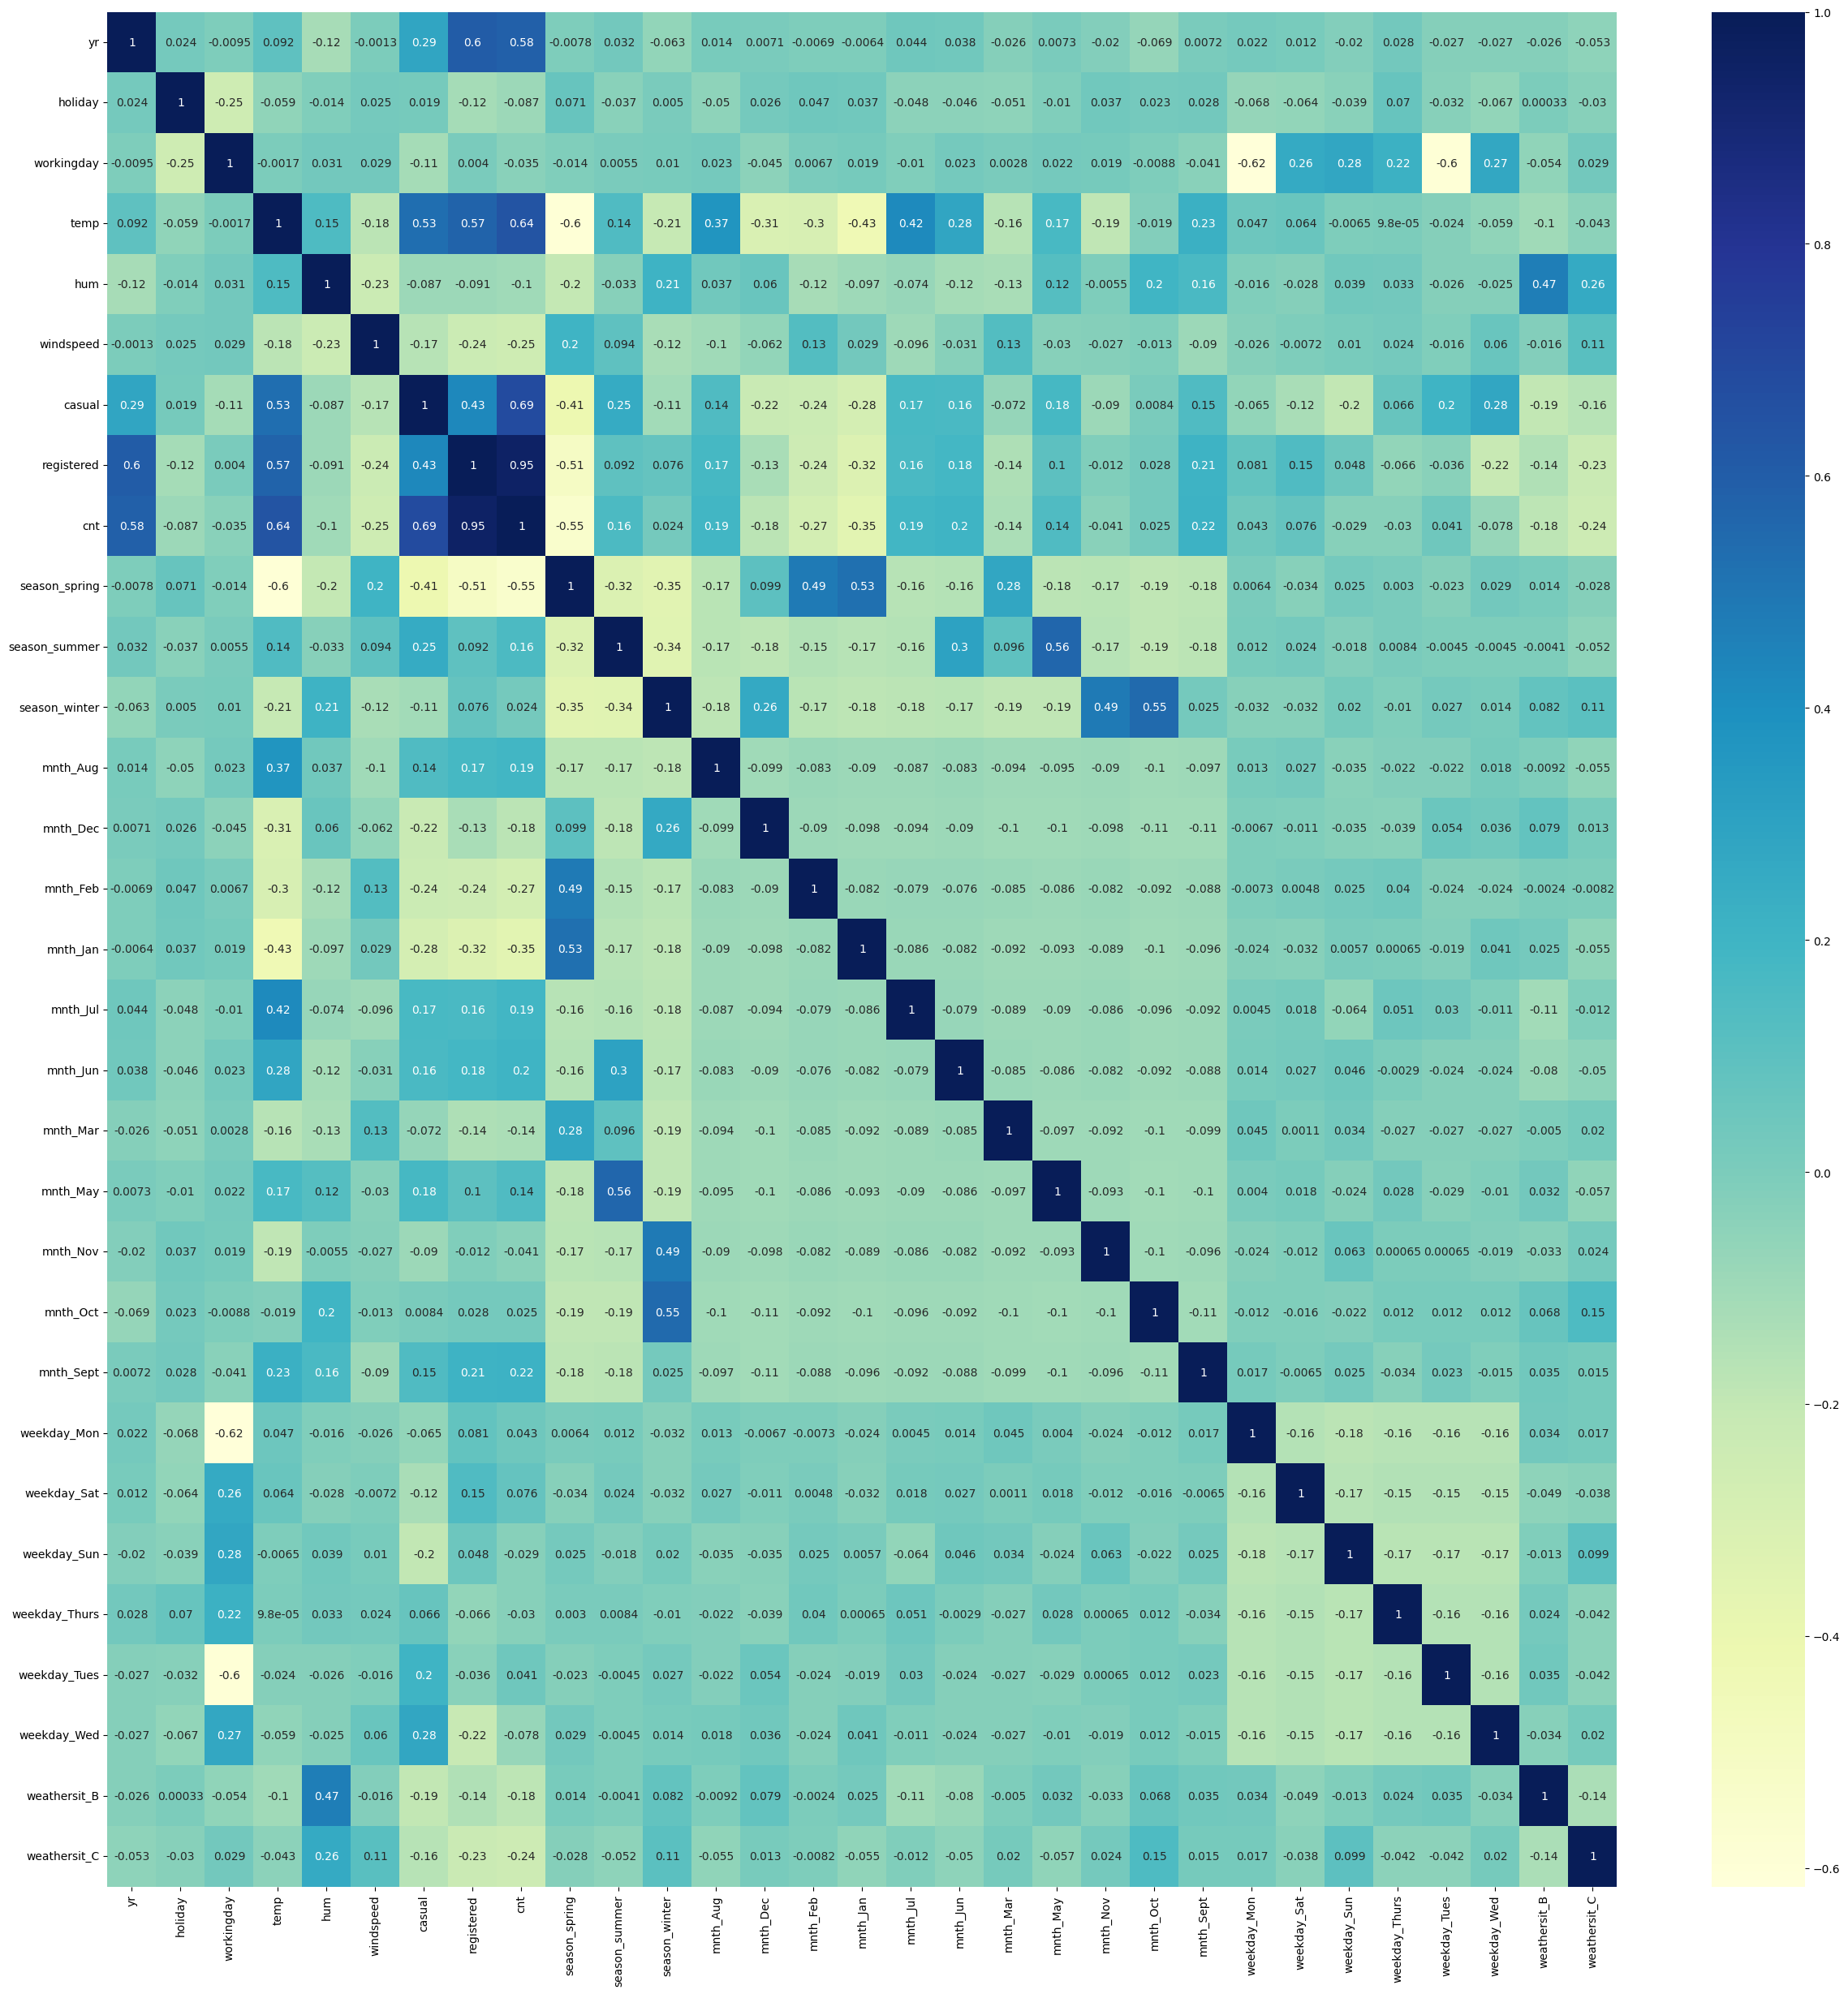

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `temp` seems to the correlated to `cnt` the most, after 'casual' and 'registered'. Let's see a pairplot for `temp` vs `cnt`.

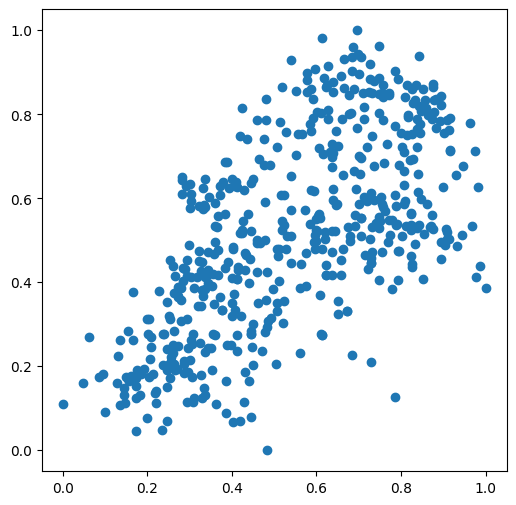

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Dividing into X and Y sets for the model building

In [ ]:
# Dropping 'casual' and 'registered' as together they add up to cnt
# Drop rows with NaN values from the training data first to ensure index alignment
df_train.dropna(inplace=True)

if 'cnt' in df_train.columns:
    y_train = df_train.pop('cnt')
else:
    # If 'cnt' is already popped, assume y_train is already defined
    print("'cnt' column not found in df_train, assuming y_train is already defined.")


columns_to_drop = []
if 'casual' in df_train.columns:
    columns_to_drop.append('casual')
if 'registered' in df_train.columns:
    columns_to_drop.append('registered')

if columns_to_drop:
    X_train = df_train.drop(columns=columns_to_drop, axis=1)
else:
     # If 'casual' and 'registered' are already dropped, assume X_train is already defined
    print("'casual' and 'registered' columns not found in df_train, assuming X_train is already defined.")

'cnt' column not found in df_train, assuming y_train is already defined.


In [ ]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
658,1.0,0.0,1.0,0.513223,0.525547,0.296167,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
58,0.0,0.0,1.0,0.441132,0.903080,0.551041,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
244,0.0,0.0,0.0,0.740244,0.749248,0.242309,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
489,1.0,0.0,0.0,0.712791,0.779734,0.269239,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
725,1.0,0.0,1.0,0.247131,0.672821,0.675656,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1.0, 0.0, 1.0, ..., True, False, False],
       [0.0, 0.0, 1.0, ..., False, True, False],
       [0.0, 0.0, 0.0, ..., False, True, False],
       ...,
       [0.0, 0.0, 1.0, ..., True, True, False],
       [0.0, 0.0, 1.0, ..., False, True, False],
       [1.0, 0.0, 1.0, ..., False, True, False]], dtype=object)

In [ ]:
X_train.shape

(526, 28)

### Building the first model with all the features

Let's now build our first model with all the features.

In [ ]:
y_train.dropna(inplace=True)

In [ ]:
X_train.dropna(inplace=True)

In [ ]:
print(y_train.isnull().sum(),X_train.isnull().sum())

1 yr               0
holiday          0
workingday       0
temp             0
hum              0
windspeed        0
season_spring    0
season_summer    0
season_winter    0
mnth_Aug         0
mnth_Dec         0
mnth_Feb         0
mnth_Jan         0
mnth_Jul         0
mnth_Jun         0
mnth_Mar         0
mnth_May         0
mnth_Nov         0
mnth_Oct         0
mnth_Sept        0
weekday_Mon      0
weekday_Sat      0
weekday_Sun      0
weekday_Thurs    0
weekday_Tues     0
weekday_Wed      0
weathersit_B     0
weathersit_C     0
dtype: int64


In [ ]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
658,1.0,0.0,1.0,0.513223,0.525547,0.296167,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
58,0.0,0.0,1.0,0.441132,0.903080,0.551041,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
244,0.0,0.0,0.0,0.740244,0.749248,0.242309,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
489,1.0,0.0,0.0,0.712791,0.779734,0.269239,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
725,1.0,0.0,1.0,0.247131,0.672821,0.675656,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.0,1.0,0.878570,0.679690,0.220508,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53,0.0,0.0,1.0,0.206042,0.435939,0.147857,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
350,0.0,0.0,1.0,0.252410,0.577930,0.455140,False,False,True,False,...,False,False,False,False,False,False,False,True,True,False
79,0.0,0.0,1.0,0.470481,0.759870,0.549180,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Ensure y_train is a pandas Series
y_train = pd.Series(y_train)

# Align indices between X_train and y_train
X_train, y_train = X_train.align(y_train, join="inner", axis=0)

# Convert boolean columns to integers
X_train_numeric = X_train.astype(int)

# Add constant
X_train_lm = sm.add_constant(X_train_numeric)

# Fit model
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.params)



const           NaN
yr              NaN
holiday         NaN
workingday      NaN
temp            NaN
hum             NaN
windspeed       NaN
season_spring   NaN
season_summer   NaN
season_winter   NaN
mnth_Aug        NaN
mnth_Dec        NaN
mnth_Feb        NaN
mnth_Jan        NaN
mnth_Jul        NaN
mnth_Jun        NaN
mnth_Mar        NaN
mnth_May        NaN
mnth_Nov        NaN
mnth_Oct        NaN
mnth_Sept       NaN
weekday_Mon     NaN
weekday_Sat     NaN
weekday_Sun     NaN
weekday_Thurs   NaN
weekday_Tues    NaN
weekday_Wed     NaN
weathersit_B    NaN
weathersit_C    NaN
dtype: float64


In [ ]:
print("y_train shape:", y_train.shape)
print("X_train_lm shape:", X_train_lm.shape)


y_train shape: (526,)
X_train_lm shape: (525, 29)


In [ ]:
# Instantiate
lm = LinearRegression()

# Ensure y_train is a pandas Series and has a name
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name='cnt')
elif y_train.name is None:
    y_train = y_train.rename("cnt")

# Drop any remaining NaNs from y_train and X_train to ensure alignment
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

# Combine into one DataFrame and drop NaNs
combined_train = pd.concat([X_train, y_train], axis=1)
combined_train = combined_train.dropna()

# Separate back
X_train = combined_train.drop(columns=[y_train.name])
y_train = combined_train[y_train.name]

# Fit model
lm.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.03374357 -0.12253199 -0.16515989 -0.20577005 -0.04614521  0.06375278
  0.03512981 -0.08466816  0.10683558  0.03517109 -0.1798646  -0.08173853
 -0.12715157 -0.0226087   0.08888406 -0.07547313  0.04018975 -0.16942588
 -0.19322153  0.05381708 -0.13299785  0.00629648 -0.05740585 -0.00555198
 -0.13416673  0.03290312  0.00856717  0.01843857]
0.818160504793418


In [ ]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 26 Sep 2025   Prob (F-statistic):                nan
Time:                        20:22:50   Log-Likelihood:                    nan
No. Observations:                 362   AIC:                               nan
Df Residuals:                     334   BIC:                               nan
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const                nan        nan        nan        nan         nan         nan
yr                   nan        nan        nan        nan         nan         nan
holiday              nan        nan        nan        nan         nan         nan
workingday           nan        nan        nan        nan         nan         nan
temp                 nan        nan        nan        nan         nan         nan
hum                  nan        nan        nan        nan         nan         nan
windspeed            nan        nan        nan        nan         nan         nan
season_spring        nan        nan        nan        nan         nan         nan
season_summer        nan        nan        nan        nan         nan         nan
season_winter        nan        nan        nan        nan         nan         nan
mnth_Aug             nan        nan        nan        nan         nan         nan
mnth_Dec             nan        nan        nan        nan         nan         nan
mnth_Feb             nan        nan        nan        nan         nan         nan
mnth_Jan             nan        nan        nan        nan         nan         nan
mnth_Jul             nan        nan        nan        nan         nan         nan
mnth_Jun             nan        nan        nan        nan         nan         nan
mnth_Mar             nan        nan        nan        nan         nan         nan
mnth_May             nan        nan        nan        nan         nan         nan
mnth_Nov             nan        nan        nan        nan         nan         nan
mnth_Oct             nan        nan        nan        nan         nan         nan
mnth_Sept            nan        nan        nan        nan         nan         nan
weekday_Mon          nan        nan        nan        nan         nan         nan
weekday_Sat          nan        nan        nan        nan         nan         nan
weekday_Sun          nan        nan        nan        nan         nan         nan
weekday_Thurs        nan        nan        nan        nan         nan         nan
weekday_Tues         nan        nan        nan        nan         nan         nan
weekday_Wed          nan        nan        nan        nan         nan         nan
weathersit_B         nan        nan        nan        nan         nan         nan
weathersit_C         nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     1.40e+16
================================================================

This model has an Adjusted R-squared value of **84.5%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.

## Model Building Using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [ ]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)
print(rfe1.ranking_)

[False  True  True  True False False  True False  True False  True  True
  True False False  True False  True  True  True  True False  True False
  True False False False]
[ 7  1  1  1  9  4  1  5  1  3  1  1  1 10  2  1  6  1  1  1  1 12  1 14
  1  8 13 11]


#### Model Building and Evaluation

Let's now check the summary of this model using `statsmodels`.

In [ ]:
# Import statsmodels
import statsmodels.api as sm

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,holiday,workingday,temp,season_spring,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Mar,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sun,weekday_Tues
58,1.0,0.0,1.0,0.441132,True,False,False,True,False,False,False,False,False,False,False,False
244,1.0,0.0,0.0,0.740244,False,False,False,False,False,False,False,False,True,False,False,True
489,1.0,0.0,0.0,0.712791,False,False,False,False,False,False,False,False,False,False,False,True
471,1.0,0.0,1.0,0.695896,False,False,False,False,False,False,False,False,False,False,False,False
127,1.0,0.0,1.0,0.594527,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Fitting the model with 15 variables

# Convert boolean columns in X_train_rfe1 to integers
X_train_rfe1_numeric = X_train_rfe1.astype(int)

lm1 = sm.OLS(y_train, X_train_rfe1_numeric).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.383
Date:                Fri, 26 Sep 2025   Prob (F-statistic):              0.153
Time:                        20:24:19   Log-Likelihood:                 41.334
No. Observations:                 361   AIC:                            -50.67
Df Residuals:                     345   BIC:                             11.55
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6042      0.240      2.513

Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from **84.5%** to **84.4%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

In [ ]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
a=X_train_rfe1.drop('const',axis=1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns

# Convert boolean columns in 'a' to integers before calculating VIF
a_numeric = a.astype(int)

vif['VIF'] = [variance_inflation_factor(a_numeric.values, i) for i in range(a_numeric.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,season_winter,9.57
3,season_spring,9.16
7,mnth_Jan,4.58
9,mnth_Nov,4.52
10,mnth_Oct,4.51
6,mnth_Feb,4.16
5,mnth_Dec,3.50
8,mnth_Mar,2.76
1,workingday,2.29
13,weekday_Sun,1.32


In [ ]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 7 features
lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=7)

# Fit with 7 features
rfe2.fit(X_train, y_train)

# Print the boolean results
print(rfe2.support_)
print(rfe2.ranking_)

[False False False  True False False  True False  True False  True False
  True False False False False  True  True False False False False False
 False False False False]
[15  7  4  1 17 12  1 13  1 11  1  3  1 18 10  2 14  1  1  9  6 20  8 22
  5 16 21 19]


In [ ]:
# Import statsmodels
import statsmodels.api as sm

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 7 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,temp,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_Nov,mnth_Oct
58,1.0,0.441132,True,False,False,False,False,False
244,1.0,0.740244,False,False,False,False,False,False
489,1.0,0.712791,False,False,False,False,False,False
471,1.0,0.695896,False,False,False,False,False,False
127,1.0,0.594527,False,False,False,False,False,False


In [ ]:
# Fitting the model with 7 variables

# Convert boolean columns in X_train_rfe2 to integers
X_train_rfe2_numeric = X_train_rfe2.astype(int)

lm2 = sm.OLS(y_train, X_train_rfe2_numeric).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.605
Date:                Fri, 26 Sep 2025   Prob (F-statistic):              0.133
Time:                        20:27:57   Log-Likelihood:                 36.452
No. Observations:                 361   AIC:                            -56.90
Df Residuals:                     353   BIC:                            -25.79
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4975      0.017     29.925

Now let's check the VIF for these selected features and decide further.

In [ ]:
b=X_train_rfe2.drop('const',axis=1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = b.columns

# Convert boolean columns in 'b' to integers before calculating VIF
b_numeric = b.astype(int)

vif['VIF'] = [variance_inflation_factor(b_numeric.values, i) for i in range(b_numeric.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,season_winter,7.10
5,mnth_Nov,3.47
6,mnth_Oct,3.47
3,mnth_Dec,2.25
1,season_spring,1.71
4,mnth_Jan,1.61
0,temp,1.00


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [ ]:
# Let's drop the 'season_winter' column as it has the highest VIF in the 7-feature model
X_train_rfe2.drop("season_winter", axis=1, inplace=True)
X_train_rfe2

,const,temp,season_spring,mnth_Dec,mnth_Jan,mnth_Nov,mnth_Oct
58,1.0,0.441132,True,False,False,False,False
244,1.0,0.740244,False,False,False,False,False
489,1.0,0.712791,False,False,False,False,False
471,1.0,0.695896,False,False,False,False,False
127,1.0,0.594527,False,False,False,False,False
...,...,...,...,...,...,...,...
280,1.0,0.586081,False,False,False,False,True
53,1.0,0.206042,True,False,False,False,False
350,1.0,0.252410,False,True,False,False,False
79,1.0,0.470481,False,False,False,False,False


In [ ]:
# Add a constant to the dataframe after dropping 'season_winter'
# X_train_rfe2 = sm.add_constant(X_train_rfe2) # Add constant again is not needed here as it was added in previous cell


# Now that we have removed one variable, let's fit the model with 6 variables

# Convert boolean columns in X_train_rfe2 to integers
X_train_rfe2_numeric = X_train_rfe2.astype(int)

lm3 = sm.OLS(y_train, X_train_rfe2_numeric).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.281
Date:                Fri, 26 Sep 2025   Prob (F-statistic):              0.265
Time:                        20:33:07   Log-Likelihood:                 34.674
No. Observations:                 361   AIC:                            -55.35
Df Residuals:                     354   BIC:                            -28.12
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5045      0.016     31.020

The model seems to be doing a good job. Let's also quickly take a look at the VIF values.

In [ ]:
c=X_train_rfe2.drop('const',axis=1)

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = c.columns

# Convert DataFrame 'c' to integers before calculating VIF
c_numeric = c.astype(int)

vif['VIF'] = [variance_inflation_factor(c_numeric.values, i) for i in range(c_numeric.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,season_spring,1.63
3,mnth_Jan,1.59
2,mnth_Dec,1.05
0,temp,1.00
4,mnth_Nov,1.00
5,mnth_Oct,1.00


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `84.5%` with **28 variables** to just `79.1%` using **6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

## Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [ ]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

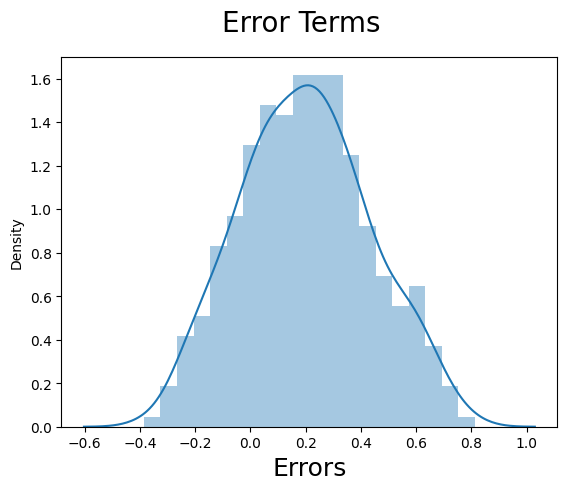

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)
# Give the X-label
plt.xlabel('Errors', fontsize = 18)

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

## Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [ ]:
X_train_rfe2

,const,temp,season_spring,mnth_Dec,mnth_Jan,mnth_Nov,mnth_Oct
58,1.0,0.441132,True,False,False,False,False
244,1.0,0.740244,False,False,False,False,False
489,1.0,0.712791,False,False,False,False,False
471,1.0,0.695896,False,False,False,False,False
127,1.0,0.594527,False,False,False,False,False
...,...,...,...,...,...,...,...
280,1.0,0.586081,False,False,False,False,True
53,1.0,0.206042,True,False,False,False,False
350,1.0,0.252410,False,True,False,False,False
79,1.0,0.470481,False,False,False,False,False


In [ ]:
# let's recall the set of variables which are to be scaled
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [ ]:
df_test[var] = scaler.transform(df_test[var])

In [ ]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test.drop(["casual","registered"],axis=1)

In [ ]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
740,0.0,0.0,0.0,0.551236,0.639759,0.232053,False,False,True,False,...,True,False,True,False,False,False,False,False,False,False
109,0.0,0.0,1.0,0.679001,0.632890,0.452579,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
399,1.0,0.0,1.0,0.259802,0.803348,0.205133,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
19,0.0,0.0,0.0,0.256634,0.554744,0.357705,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
518,1.0,0.0,1.0,0.688505,0.508372,0.333343,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=c.columns
col2

Index(['temp', 'season_spring', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov',
       'mnth_Oct'],
      dtype='object')

In [ ]:
# Let's subset these columns and create a new dataframe 'X_test_rfe1'
X_test_rfe2 = X_test[col2]

In [ ]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 740 to 662
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          226 non-null    float64
 1   temp           225 non-null    float64
 2   season_spring  226 non-null    bool   
 3   mnth_Dec       226 non-null    bool   
 4   mnth_Jan       226 non-null    bool   
 5   mnth_Nov       226 non-null    bool   
 6   mnth_Oct       226 non-null    bool   
dtypes: bool(5), float64(2)
memory usage: 6.4 KB


In [ ]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

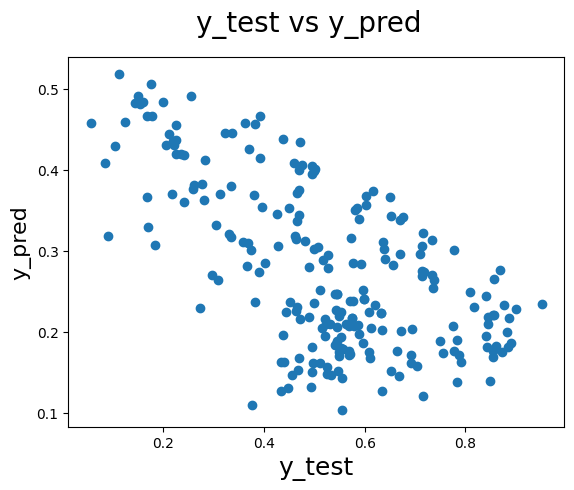

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [ ]:
y_test.dropna(inplace=True)

In [ ]:
y_pred.dropna(inplace=True)

In [ ]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-2.393041808444831

Thus, for the model with 6 variables, the r-squared on training and test data is about 79.3% and 78.02% respectively. The adjusted r-squared on the train set is about is about 79.1%.

#### Checking the correlations between the final predictor variables

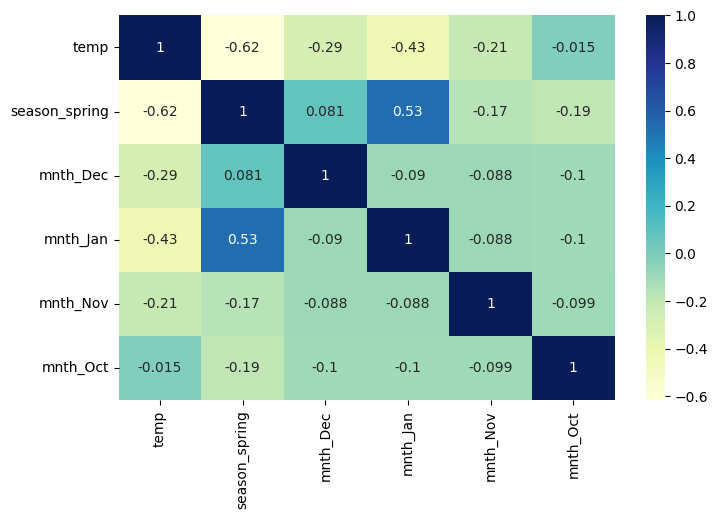

In [ ]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(BS_day[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations.

Thus, the final model consists of the 6 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.



# Happy Learning and Coding
# Don't forget to upvote     :-)))